# **PALINDROME DATA**

Klari van Zyl

**DATA SCIENCE RESIDENCY INTERVIEW ASSIGNMENT**

INSTRUCTIONS & TASKS:

1) Download the dataset.

2) Calculate and output the following:

    a) What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?
    b) What is the average NoPLHIV of the two estimates used for "Xhariep"?
    c) Add a column and populate it with the number of people not living with HIV for each row.
    d) What is the total NoPLHIV in all cities (districts with the word "city" or "metro" in the name)?

3) Write the original data (without the caption - originally row 1) with the extra columns as *comma-seperated values* (CSV) to a new .csv file.



Importing the needed libraries

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

# To enable plotting graphs
%matplotlib inline

In [33]:
# Docking google drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [35]:
# Setting up the notebook path

import os

os.chdir('/content/drive/My Drive/PALINDROME')
assign_path = '.'

In [36]:
# Reading the data as a data frame
## Note that the .xlsx file was converted to a .csv file 
### .xlsx files can easily be converted to .csv files using Microsoft Excell

# df -> dataframe

df = pd.read_csv('pone.0212445.s004.csv')

In [37]:
# Viewing the top 20 rows of the dataset

df.head(20)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789
5,West Coast,DC1,Fay-Heriott,4.088319,2.414351,6.841548,17114,10107,28639
6,Cacadu,DC10,Survey,7.600000,3.484000,11.716000,34732,15922,53542
7,Cacadu,DC10,Fay-Heriott,8.912387,6.145010,12.756646,40729,28083,58298
8,Amatole,DC12,Survey,11.000000,7.276000,14.724000,98884,65407,132361
9,Amatole,DC12,Fay-Heriott,11.878608,9.090702,15.376883,106783,81721,138230


In [38]:
# Viewing the shape of the dataset 

df.shape

(104, 9)

In [ ]:
# There are 9 columns and 104 rows in the dataset

# Columns/Variables present are as follows:
## 'District'
## 'Code'
## 'Estimate'
## 'Prevalence_%'
## 'Prevalence_LCL
## 'Prevalence_UCL'
## 'NoPLHIV'
## 'NoPLHIV_LCL'
## 'NoPLHIV_UCL'

# Estimate variable is split into two sub-categories, namely: Survey of Fay-Heriott

In [40]:
# Viewing the information about the dataset
# this gives us a good idea about the data types etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        104 non-null    object 
 1   Code            104 non-null    object 
 2   Estimate        104 non-null    object 
 3   Prevalence_%    104 non-null    float64
 4   Prevalence_LCL  104 non-null    float64
 5   Prevalence_UCL  104 non-null    float64
 6   NoPLHIV         104 non-null    int64  
 7   NoPLHIV_LCL     104 non-null    int64  
 8   NoPLHIV_UCL     104 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ KB


In [41]:
# Checking the statistical summary 

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Prevalence_%,104.0,12.113805,4.978586,1.584032,8.869829,11.750000,15.718785,25.000000
Prevalence_LCL,104.0,8.507655,4.635330,0.000000,4.911882,8.165653,11.617805,18.218028
Prevalence_UCL,104.0,16.142182,6.055076,2.998406,12.301325,15.935119,19.378361,40.945994
NoPLHIV,104.0,123914.230769,115469.372356,1876.000000,46667.500000,99751.500000,146335.500000,515387.000000
NoPLHIV_LCL,104.0,89210.009615,89791.909524,0.000000,28057.750000,69407.500000,115101.250000,408472.000000
NoPLHIV_UCL,104.0,162458.317308,145761.963447,3552.000000,68507.750000,136812.000000,181302.250000,660996.000000


In [42]:
# Checking for any missing values

df.isna().sum()

District          0
Code              0
Estimate          0
Prevalence_%      0
Prevalence_LCL    0
Prevalence_UCL    0
NoPLHIV           0
NoPLHIV_LCL       0
NoPLHIV_UCL       0
dtype: int64

In [ ]:
# There are no missing values

1a) What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [61]:
# Quick look at the head of the file again

df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,753213
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,753209
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3860596
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3860587
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,418592


In [44]:
# Using the groupby() and sum function from Pandas
## The groupby() function splits the dataframe into the necessary variables: Estimate, NoPLHIV and Survey as the condition

df.groupby('Estimate')['NoPLHIV'].sum()['Survey']

6409903

In [ ]:
# The total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate is: 6409903

In [48]:
# Selecting the two relevant rows to create a new temporary dataset.
## The rows to be selected are the two Xhariep rows which includes the data from the Survey and Fay-Heriott

# Rename the sliced dataset to df_ave as to not confure or overwrite the original df dataset that is being used for overall functions

df_ave = df[16:18]

# View the head of the sliced set to check if the slice worked correctly

df_ave.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
16,Xhariep,DC16,Survey,8.30000,6.144000,10.456000,11777,8718,14836
17,Xhariep,DC16,Fay-Heriott,8.96307,7.187823,11.124214,12718,10199,15784


In [49]:
# Using the Pandas mean function to calculate the average

df_mean = df_ave["NoPLHIV"].mean()

# Print the mean

print(df_mean)

12247.5


In [ ]:
# The average of the two estimates used for Xhariep is: 12247.5

2c) Add a column and populate it with the number of people not living with HIV for each row.

In [ ]:
# Inverse percentage calculation necessary
# Prevalence_% of y(?) = x

# NoPNLHIV = (NoPLHIV * 100) / (Prevalence_%)

# eg.
## NoPNLHIV = (11777 * 100) / (8.3)
## NoPNLHIV =  1177700 / 8.3
## NoPNLHIV =  141891.566

In [50]:
# Adding a column to the df dataset using Pandas
# Simultaneously incorporating the chosen formula for the number of people not living with HIV
# NoPNLHIV -> People Not Living with HIV

df['NoPNLHIV'] = df["NoPLHIV"]*100 / df["Prevalence_%"]

# Print the df dataset to check if the formula worked correctly

print(df)

                     District Code  ... NoPLHIV_UCL      NoPNLHIV
0                Buffalo City  BUF  ...      127534  7.532132e+05
1                Buffalo City  BUF  ...      123691  7.532099e+05
2           City of Cape Town  CPT  ...      283985  3.860596e+06
3           City of Cape Town  CPT  ...      320548  3.860587e+06
4                  West Coast  DC1  ...       22789  4.185926e+05
..                        ...  ...  ...         ...           ...
99                   Mangaung  MAN  ...      136792  1.109821e+06
100  Nelson Mandela Bay Metro  NMA  ...      154995  1.174205e+06
101  Nelson Mandela Bay Metro  NMA  ...      154757  1.174202e+06
102           City of Tshwane  TSH  ...      494661  3.089316e+06
103           City of Tshwane  TSH  ...      450265  3.089319e+06

[104 rows x 10 columns]


In [51]:
# I would like to display the NoPNLHIV column without the E notation and in the preferred numerical format
# Converting the NoPNLHIV column to a int will remove the messy numbers 

df["NoPNLHIV"] = df["NoPNLHIV"].apply(np.int64)
print(df)

                     District Code  ... NoPLHIV_UCL  NoPNLHIV
0                Buffalo City  BUF  ...      127534    753213
1                Buffalo City  BUF  ...      123691    753209
2           City of Cape Town  CPT  ...      283985   3860596
3           City of Cape Town  CPT  ...      320548   3860587
4                  West Coast  DC1  ...       22789    418592
..                        ...  ...  ...         ...       ...
99                   Mangaung  MAN  ...      136792   1109820
100  Nelson Mandela Bay Metro  NMA  ...      154995   1174204
101  Nelson Mandela Bay Metro  NMA  ...      154757   1174202
102           City of Tshwane  TSH  ...      494661   3089316
103           City of Tshwane  TSH  ...      450265   3089318

[104 rows x 10 columns]


2d) What is the total NoPLHIV in all cities (districts with the word "city" or "metro" in the name)?

In [52]:
# Use Pandas filter string contain function
# This function selects the rows that contain the specific text contents

df[df['District'].str.contains("City|Metro")]

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,753213
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,753209
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3860596
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3860587
96,City of Johannesburg,JHB,Survey,11.100000,7.964000,14.236000,515387,369778,660996,4643126
97,City of Johannesburg,JHB,Fay-Heriott,11.075306,8.760104,13.909111,514241,406743,645818,4643131
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,1174204
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,1174202
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,3089316
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,3089318


In [ ]:
# There are 10 rows in total that contain data for districts with the word "city" or "metro"

In [53]:
# Creating a new dataset that only contains the rows with the districts that contain the word "city" or "metro"
# Creating this smaller dataset will make it easier to calculate the NoPLHIV in all cities

df_cities = df[df['District'].str.contains("City|Metro")]

# View the new dataset, df_cities, head to ensure the code executed correctly

df_cities.head(10)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,753213
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,753209
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3860596
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3860587
96,City of Johannesburg,JHB,Survey,11.100000,7.964000,14.236000,515387,369778,660996,4643126
97,City of Johannesburg,JHB,Fay-Heriott,11.075306,8.760104,13.909111,514241,406743,645818,4643131
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,1174204
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,1174202
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,3089316
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,3089318


In [54]:
# Use the groupby() and sum function from Pandas

df_cities.groupby('Estimate')['NoPLHIV'].sum()

Estimate
Fay-Heriott    1295249
Survey         1277484
Name: NoPLHIV, dtype: int64

3) Write the original data (without the caption - originally row 1) with the extra columns as *comma-seperated values* (CSV) to a new .csv file.

In [58]:
# Use Pandas to write the file to .csv

df.to_csv('Palindrome_HIV_Data_Assign_KlarivZyl.csv')

In [59]:
# Use Pandas to read the newly saved file

HIV_data = pd.read_csv('Palindrome_HIV_Data_Assign_KlarivZyl.csv')

In [60]:
# And view the head of the file to ensure that the .csv file was written correctly

HIV_data.head(20)

,Unnamed: 0,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
0,0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,753213
1,1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,753209
2,2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3860596
3,3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3860587
4,4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,418592
5,5,West Coast,DC1,Fay-Heriott,4.088319,2.414351,6.841548,17114,10107,28639,418607
6,6,Cacadu,DC10,Survey,7.600000,3.484000,11.716000,34732,15922,53542,457000
7,7,Cacadu,DC10,Fay-Heriott,8.912387,6.145010,12.756646,40729,28083,58298,456993
8,8,Amatole,DC12,Survey,11.000000,7.276000,14.724000,98884,65407,132361,898945
9,9,Amatole,DC12,Fay-Heriott,11.878608,9.090702,15.376883,106783,81721,138230,898952


**END OF ASSIGMENT QUESTIONS**

EXTRAS -  Quick Visual Look at the Data


In [63]:
# Read first 10 rows at the ehad of the file

HIV_data.head(10)

,Unnamed: 0,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
0,0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,753213
1,1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,753209
2,2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3860596
3,3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3860587
4,4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,418592
5,5,West Coast,DC1,Fay-Heriott,4.088319,2.414351,6.841548,17114,10107,28639,418607
6,6,Cacadu,DC10,Survey,7.600000,3.484000,11.716000,34732,15922,53542,457000
7,7,Cacadu,DC10,Fay-Heriott,8.912387,6.145010,12.756646,40729,28083,58298,456993
8,8,Amatole,DC12,Survey,11.000000,7.276000,14.724000,98884,65407,132361,898945
9,9,Amatole,DC12,Fay-Heriott,11.878608,9.090702,15.376883,106783,81721,138230,898952


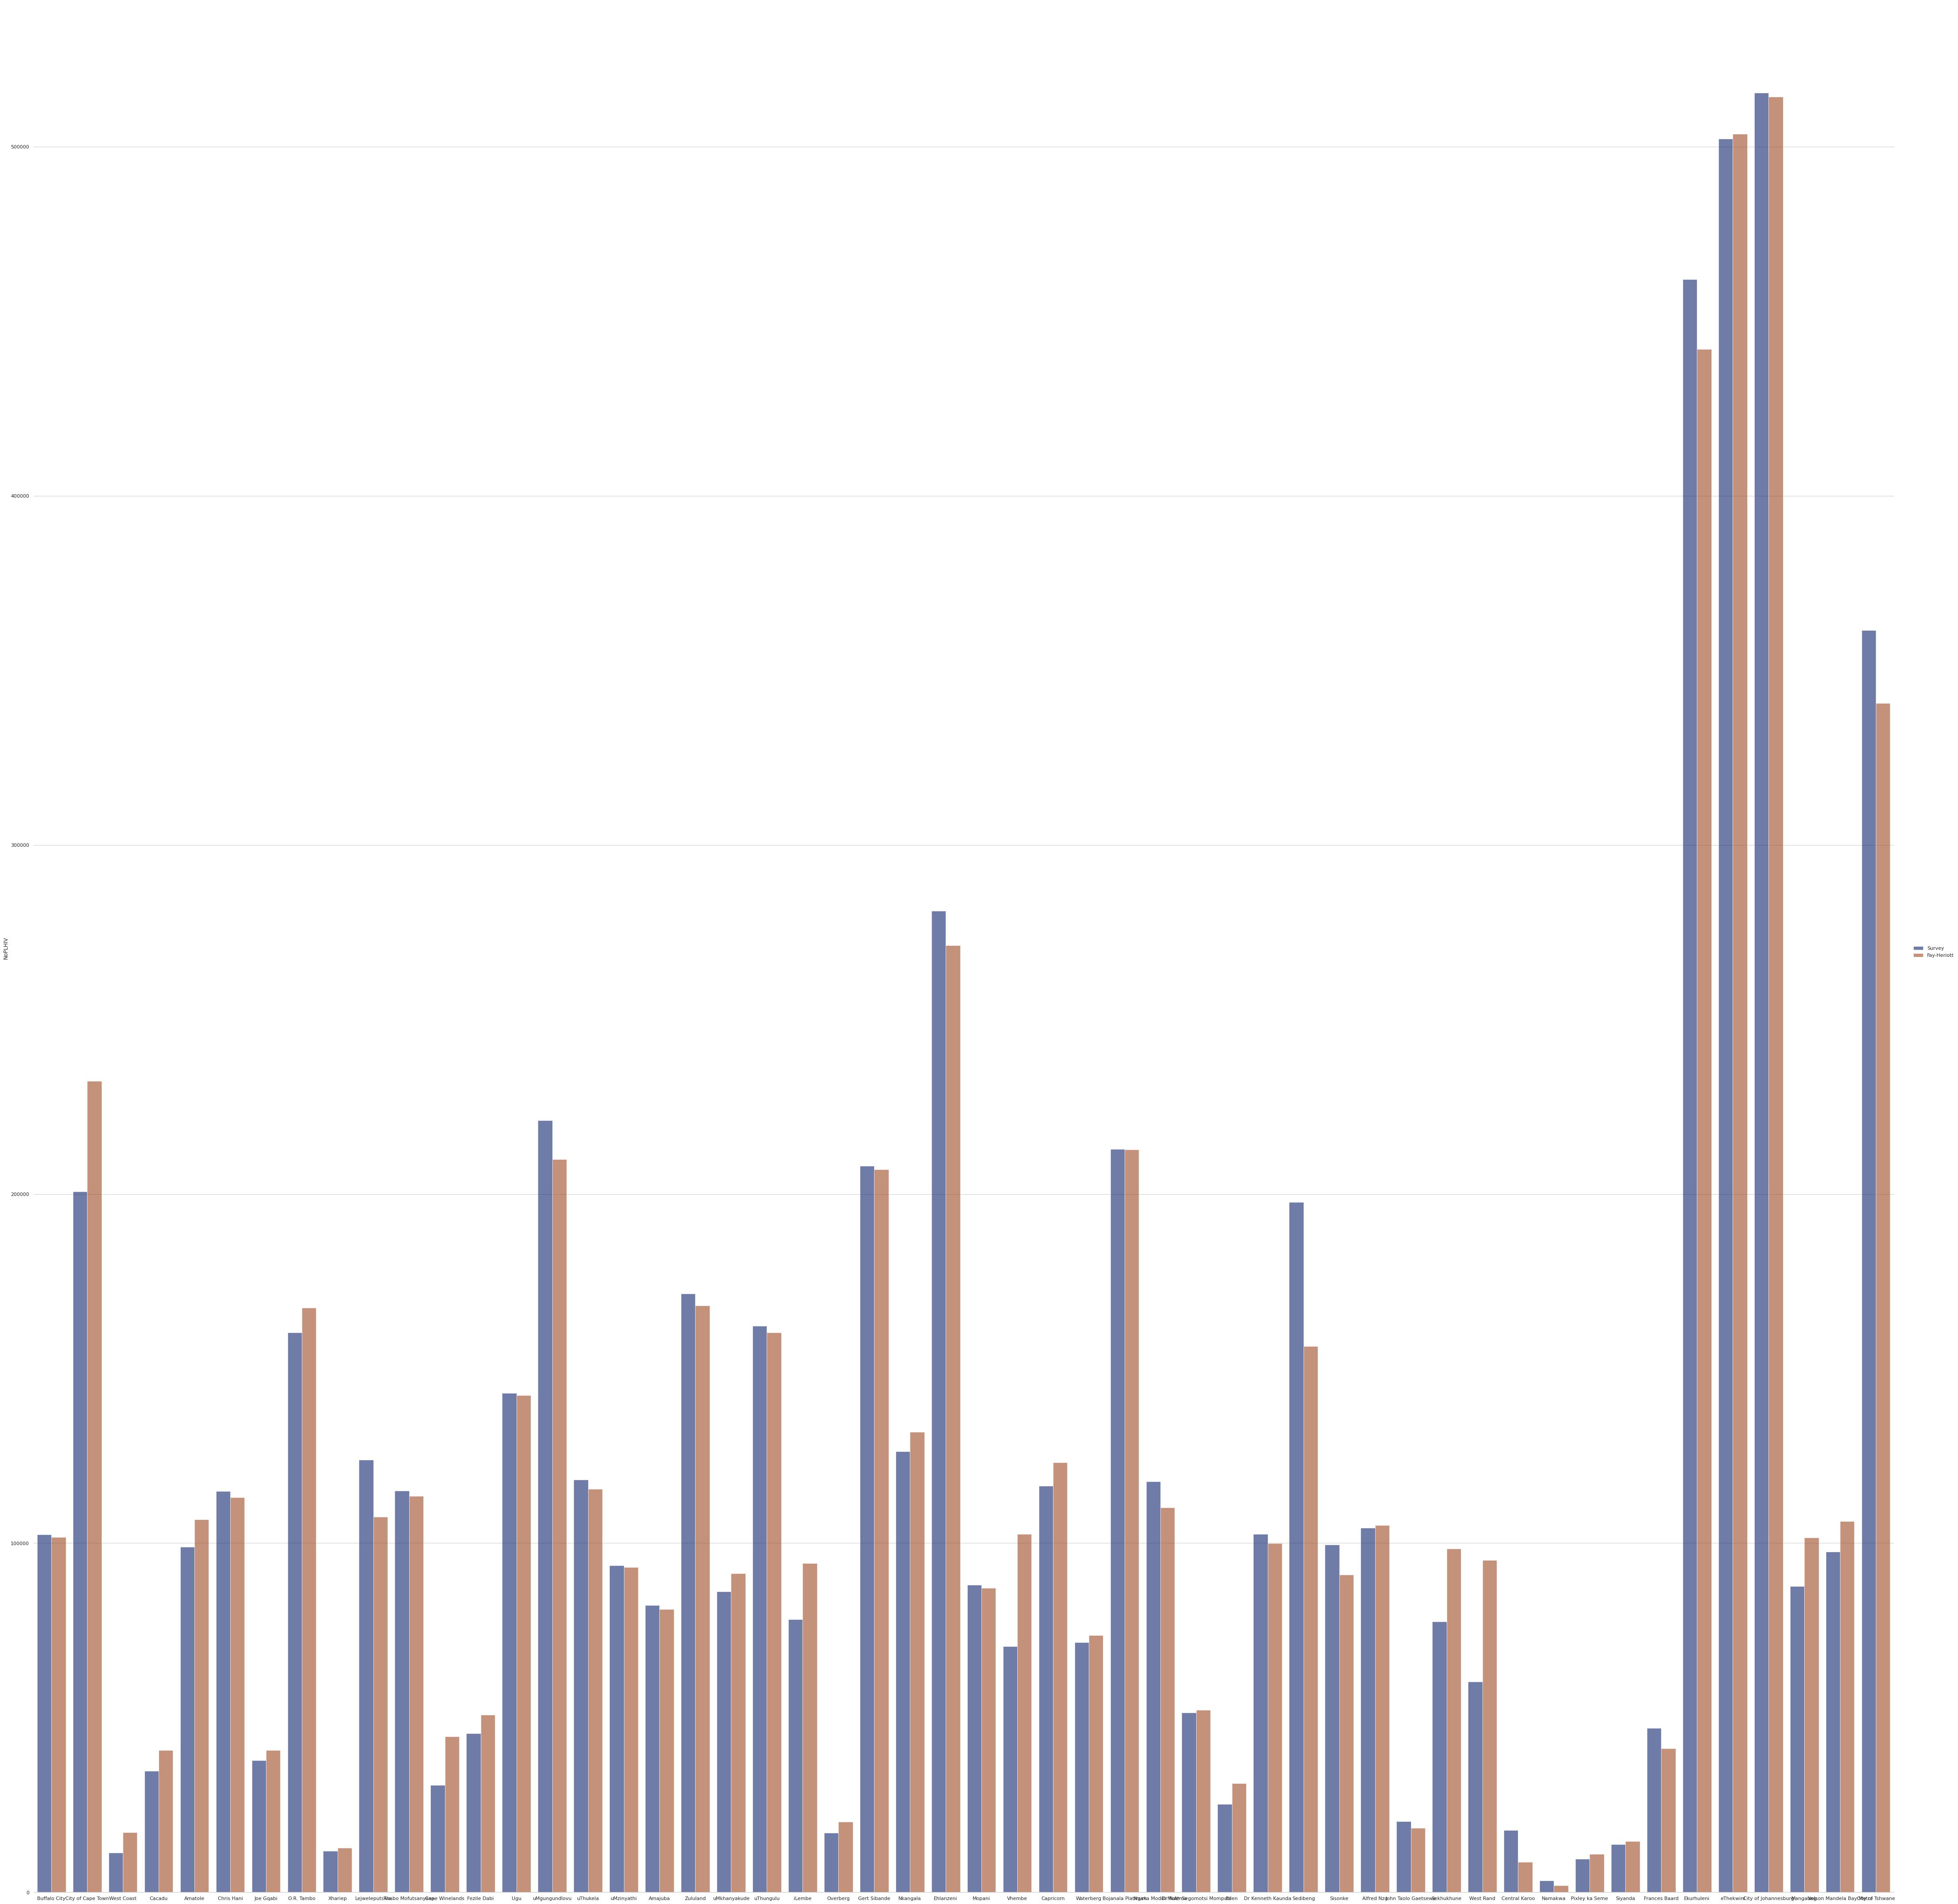

In [84]:
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data=HIV_data, kind="bar",
    x="District", y="NoPLHIV", hue="Estimate",
    ci="sd", palette="dark", alpha=.60, height=60
)
g.despine(left=True)
g.set_axis_labels("", "NoPLHIV")
g.legend.set_title("")

In [ ]:
# From the catplot above we can see that the differences between the Survey and Fay-Heriott isn't too large
# Upon zooming into the graph, it is clear that the City of Johannesburg has the largest amount of people living with HIV
# Namakwa seems to have the lowest count of people living with HIV

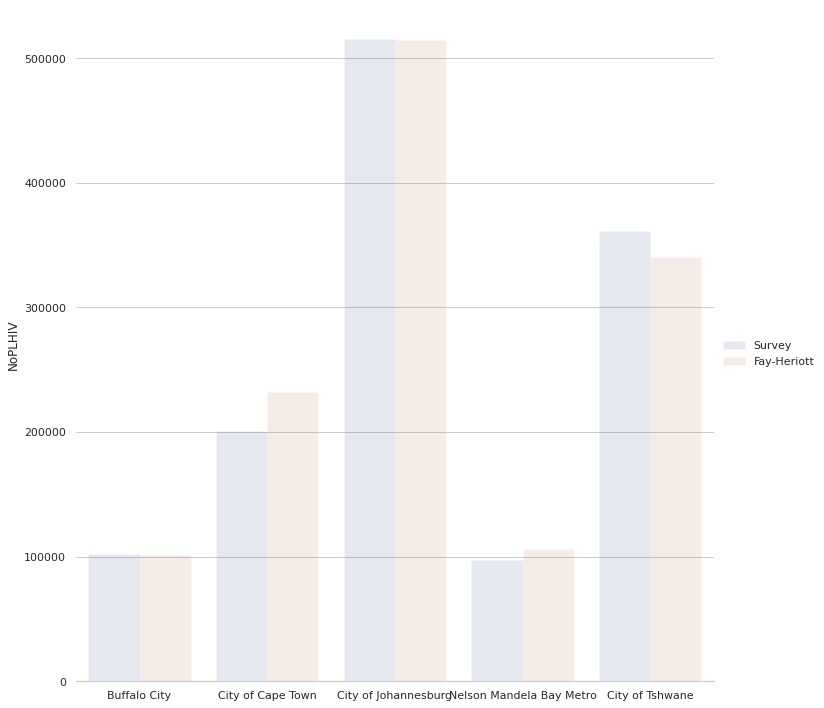

In [96]:
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data=df_cities, kind="bar",
    x="District", y="NoPLHIV", hue="Estimate",
    ci="sd", palette="dark", alpha=.10, height=10
)
g.despine(left=True)
g.set_axis_labels("", "NoPLHIV")
g.legend.set_title("")

In [87]:
# Above we now have a clear visual of the count of people living with HIV in the City and Metro districts.
# Once again the Survey data is not too far off from the Fay-Heriott data, except for the City of Cape Town and the City of Tshwane

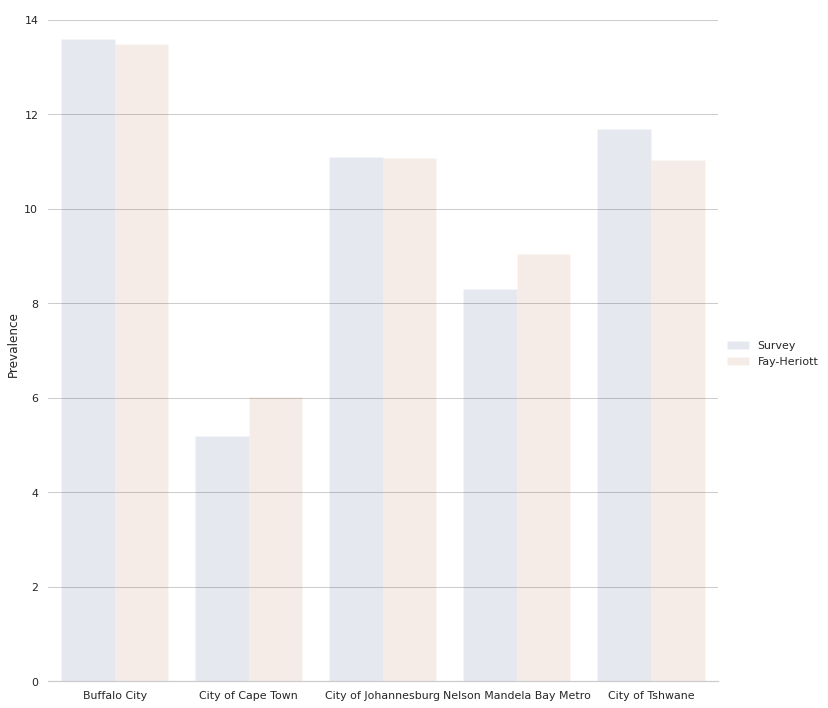

In [97]:
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data=df_cities, kind="bar",
    x="District", y="Prevalence_%", hue="Estimate",
    ci="sd", palette="dark", alpha=.10, height=10
)
g.despine(left=True)
g.set_axis_labels("", "Prevalence")
g.legend.set_title("")

In [ ]:
# This is now where the data becomes interesting and where once has to look at the bigger picture.
# Even though the City of Johannesburg trumps the other city and metro areas int the number of people living with age,
## when looking at the actual percentages of prevalence per city/metro, it seems that the prevalence of people living with HIV
### is the highest in Buffalo City. Yet in numbers, it was th lowest.

In [102]:
#END